In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


%matplotlib inline

In [27]:
# import some data to play with
iris = datasets.load_iris()
type(iris)
iris.data.shape

(150, 4)

In [20]:
clf = SVC()
clf.fit(iris.data, iris.target_names[iris.target])
clf.predict(iris.data[:3])
iris.target_names[iris.target[:3]]

array(['setosa', 'setosa', 'setosa'], 
      dtype='<U10')

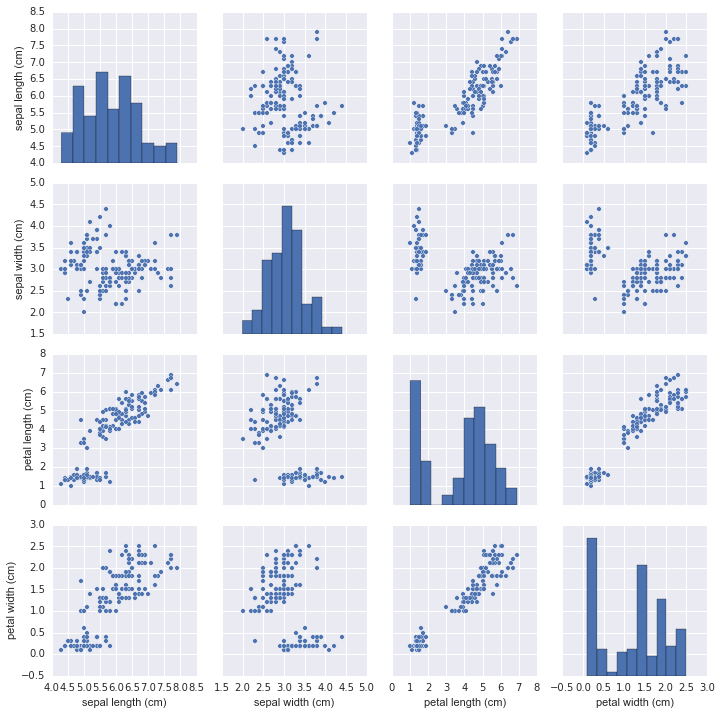

In [88]:
irisFrame = pd.DataFrame(iris.data, columns = iris.feature_names)
sns.pairplot(irisFrame)

In [33]:
#Datos
x = iris.data
y = iris.target

In [42]:
#Clasificador
knn = KNeighborsClassifier(n_neighbors=2)

#Ajuste a los datos. Acá ocurre la magia
knn.fit(x, y)
x_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(x_new)

array([1, 1])

In [56]:
#Obtiene datos de entrenamiento y de testeo, junto con los targets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

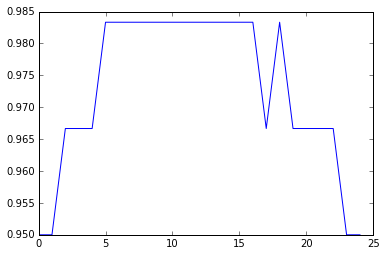

In [57]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(scores)

[('TV', 0.046564567874150253), ('Radio', 0.17915812245088844), ('Newspaper', 0.0034504647111804482)]
1.40465142303


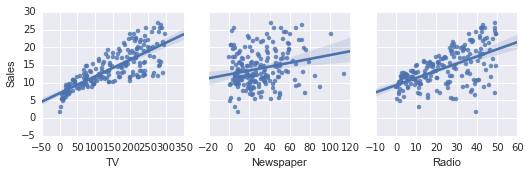

In [117]:
sales = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
sns.pairplot(sales, x_vars=["TV", "Newspaper", "Radio"], y_vars="Sales",kind='reg')
features = ['TV', 'Radio', 'Newspaper']
x = sales[features]
y = sales["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#Método regresor
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

print(list(zip(features, linreg.coef_)))

#Predicción, lease f(x_test)
y_pred = linreg.predict(x_test)

#Y el error cuadrático. (f(x_text) - y_test)**2
print(np.sqrt(mean_squared_error(y_test, y_pred)))